## Part 1

In [14]:
import pandas as pd

In [15]:
import pip

### Read the Wikipedia Website to Dataframe

In [16]:
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


### Removing the Not Assigned Data 

In [17]:
df = df[df.Borough != "Not assigned"]

### Grouping the Neighbourhoods by Postal Code/Borough

In [54]:
df2 = df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(lambda x: ','.join(x.astype(str))).reset_index()
df2.head(103)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [19]:
df2.loc[df2['Neighbourhood'] == ('Not assigned'), 'Neighbourhood'] = df2['Borough']

In [20]:
print("The final number of rows in this dataframe is", df2.shape[0])

The final number of rows in this dataframe is 103


## Part 2

### Read the CSV provided to get Geographical Data - LONG And LAT.

In [21]:
da = pd.read_csv('http://cocl.us/Geospatial_data')

In [22]:
da.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Inserting and Merging the Geographical Data to the Orignal Datagrame

In [10]:
df_toronto = pd.merge(df2, da, left_on = 'Postcode', right_on = 'Postal Code')
df_toronto.head()

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


In [44]:
import numpy as np 

from geopy.geocoders import Nominatim
import requests 

from pandas.io.json import json_normalize 
import json

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
!pip install folium
import folium

### Deciding to work with the Borough Etobcoke as the focus

In [24]:
df_etobicoke = df_toronto[df_toronto['Borough'] == 'Etobicoke'].reset_index(drop=True)
df_etobicoke

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M8V,Etobicoke,"Humber Bay Shores,Mimico South,New Toronto",M8V,43.605647,-79.501321
1,M8W,Etobicoke,"Alderwood,Long Branch",M8W,43.602414,-79.543484
2,M8X,Etobicoke,"The Kingsway,Montgomery Road,Old Mill North",M8X,43.653654,-79.506944
3,M8Y,Etobicoke,"Humber Bay,King's Mill Park,Kingsway Park Sout...",M8Y,43.636258,-79.498509
4,M8Z,Etobicoke,"Kingsway Park South West,Mimico NW,The Queensw...",M8Z,43.628841,-79.520999
5,M9A,Etobicoke,Islington Avenue,M9A,43.667856,-79.532242
6,M9B,Etobicoke,"Cloverdale,Islington,Martin Grove,Princess Gar...",M9B,43.650943,-79.554724
7,M9C,Etobicoke,"Bloordale Gardens,Eringate,Markland Wood,Old B...",M9C,43.643515,-79.577201
8,M9P,Etobicoke,Westmount,M9P,43.696319,-79.532242
9,M9R,Etobicoke,"Kingsview Village,Martin Grove Gardens,Richvie...",M9R,43.688905,-79.554724


### Function to make the nearby venues easier

In [45]:
e_lat = 43.62
e_long = -79.51

# create map of Manhattan using latitude and longitude values
map_etobicoke = folium.Map(location=[e_lat, e_long], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_etobicoke['Latitude'], df_etobicoke['Longitude'], df_etobicoke['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_etobicoke)  
    

In [46]:
CLIENT_ID = 'RJRNPM53LPRPIQT1ZC2YQTVSLJ3CP3LXE3CRH0DVCO0LODOL' 
CLIENT_SECRET = 'XIADFIC2V4FL453CQEM0S22EMIGSXTYRUF5RS4E2XX40KKO3'
VERSION = '20190623'

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            800, 
            300)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Reaching Foursquare to get the nearby venues in Etobicoke

In [47]:
etobicoke_venues = getNearbyVenues(names=df_etobicoke['Neighbourhood'],
                                   latitudes=df_etobicoke['Latitude'],
                                   longitudes=df_etobicoke['Longitude']
                                  )

Humber Bay Shores,Mimico South,New Toronto
Alderwood,Long Branch
The Kingsway,Montgomery Road,Old Mill North
Humber Bay,King's Mill Park,Kingsway Park South East,Mimico NE,Old Mill South,The Queensway East,Royal York South East,Sunnylea
Kingsway Park South West,Mimico NW,The Queensway West,Royal York South West,South of Bloor
Islington Avenue
Cloverdale,Islington,Martin Grove,Princess Gardens,West Deane Park
Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe
Westmount
Kingsview Village,Martin Grove Gardens,Richview Gardens,St. Phillips
Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown
Northwest


In [48]:
etobicoke_onehot = pd.get_dummies(etobicoke_venues[['Venue Category']], prefix="", prefix_sep="")
etobicoke_onehot['Neighbourhood'] = etobicoke_venues['Neighbourhood'] 
fixed_columns = [etobicoke_onehot.columns[-1]] + list(etobicoke_onehot.columns[:-1])
etobicoke_venuelist = etobicoke_onehot.groupby('Neighbourhood').mean().reset_index()

### Find the 5 most popular venues

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
e_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
e_neighborhoods_venues_sorted['Neighbourhood'] = etobicoke_venuelist['Neighbourhood']

for ind in np.arange(etobicoke_venuelist.shape[0]):
    e_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(etobicoke_venuelist.iloc[ind, :], num_top_venues)

e_neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Grocery Store,Pizza Place,Pharmacy,Beer Store,Fast Food Restaurant
1,"Alderwood,Long Branch",Pizza Place,Convenience Store,Gas Station,Dance Studio,Park
2,"Bloordale Gardens,Eringate,Markland Wood,Old B...",Coffee Shop,Pharmacy,Park,Pizza Place,Café
3,"Cloverdale,Islington,Martin Grove,Princess Gar...",Convenience Store,Pizza Place,Bank,Hotel,Clothing Store
4,"Humber Bay Shores,Mimico South,New Toronto",Café,Park,Pizza Place,Elementary School,Fried Chicken Joint


### Run K means Clustering 

In [49]:
# set number of clusters
kclusters = 5

etobicoke_venuelist_clustering = etobicoke_venuelist.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(etobicoke_venuelist_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 0, 0, 0, 0, 3, 2, 4, 0, 1], dtype=int32)

In [51]:
e_neighborhoods_venues_sorted.insert(0, 'clusters', kmeans.labels_)

### Merge data to one dataframe

In [40]:
df_etobicoke_merged = df_etobicoke

df_etobicoke_merged = df_etobicoke_merged.join(e_neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

df_etobicoke_merged.dropna(axis=0,inplace = True)
df_etobicoke_merged['Clusters'] = df_etobicoke_merged['Clusters'].astype('int')

df_etobicoke_merged

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M8V,Etobicoke,"Humber Bay Shores,Mimico South,New Toronto",M8V,43.605647,-79.501321,0,Café,Park,Pizza Place,Elementary School,Fried Chicken Joint
1,M8W,Etobicoke,"Alderwood,Long Branch",M8W,43.602414,-79.543484,0,Pizza Place,Convenience Store,Gas Station,Dance Studio,Park
2,M8X,Etobicoke,"The Kingsway,Montgomery Road,Old Mill North",M8X,43.653654,-79.506944,0,Italian Restaurant,Park,Sushi Restaurant,Breakfast Spot,Liquor Store
3,M8Y,Etobicoke,"Humber Bay,King's Mill Park,Kingsway Park Sout...",M8Y,43.636258,-79.498509,3,Baseball Field,Park,Gym / Fitness Center,Electronics Store,Convenience Store
4,M8Z,Etobicoke,"Kingsway Park South West,Mimico NW,The Queensw...",M8Z,43.628841,-79.520999,0,Coffee Shop,Gym / Fitness Center,Burrito Place,American Restaurant,Italian Restaurant
5,M9A,Etobicoke,Islington Avenue,M9A,43.667856,-79.532242,2,Pharmacy,Bank,Park,Café,Playground
6,M9B,Etobicoke,"Cloverdale,Islington,Martin Grove,Princess Gar...",M9B,43.650943,-79.554724,0,Convenience Store,Pizza Place,Bank,Hotel,Clothing Store
7,M9C,Etobicoke,"Bloordale Gardens,Eringate,Markland Wood,Old B...",M9C,43.643515,-79.577201,0,Coffee Shop,Pharmacy,Park,Pizza Place,Café
8,M9P,Etobicoke,Westmount,M9P,43.696319,-79.532242,4,Pizza Place,Golf Course,Chinese Restaurant,Coffee Shop,Discount Store
9,M9R,Etobicoke,"Kingsview Village,Martin Grove Gardens,Richvie...",M9R,43.688905,-79.554724,4,Sandwich Place,American Restaurant,Coffee Shop,Mobile Phone Shop,Supplement Shop


### Map of the Clustered data

In [53]:
# create map
map_clusters = folium.Map(location=[e_lat, e_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_etobicoke_merged['Latitude'], df_etobicoke_merged['Longitude'], df_etobicoke_merged['Neighbourhood'],df_etobicoke_merged['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

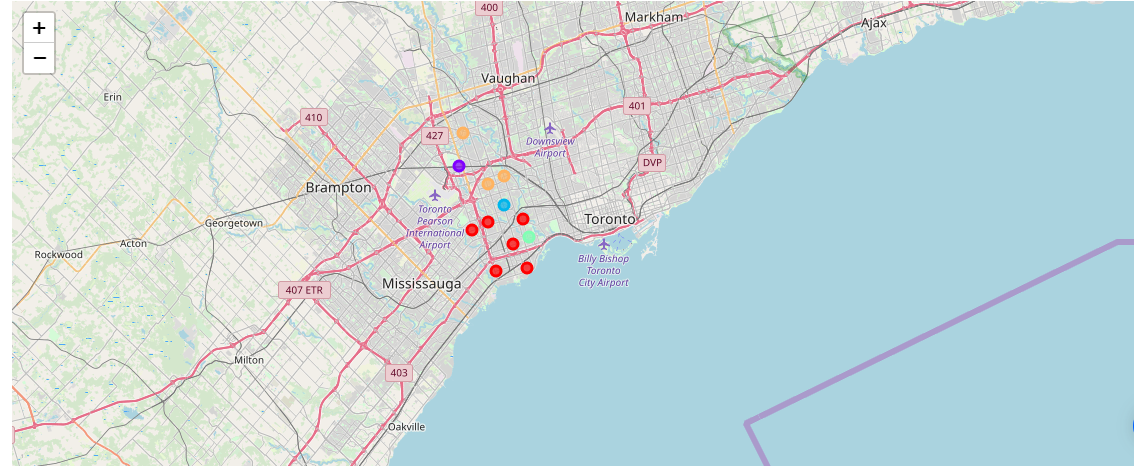